In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.cluster.vq import whiten, kmeans, vq

In [2]:
np.random.seed(571)

In [3]:
x_cord = np.concatenate((np.random.randint(10, 40, 10), np.random.randint(60, 90, 10), np.random.randint(10, 40, 10)))
y_cord = np.concatenate((np.random.randint(10, 40, 10), np.random.randint(60, 90, 10), np.random.randint(60, 90, 10)))

df = pd.DataFrame({'x_cord': x_cord, 'y_cord': y_cord})
df.head()

x_cord  y_cord
0      19      10
1      11      22
2      35      21
3      16      35
4      16      13

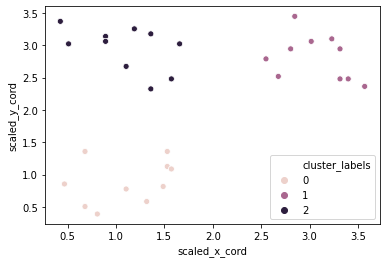

In [4]:
df['scaled_x_cord'] = whiten(df.x_cord)
df['scaled_y_cord'] = whiten(df.y_cord)
cluster_centers, _ = kmeans(df[['scaled_x_cord', 'scaled_y_cord']], 3)
df['cluster_labels'], _ = vq(df[['scaled_x_cord', 'scaled_y_cord']], cluster_centers)
sns.scatterplot(x = 'scaled_x_cord', y='scaled_y_cord', hue='cluster_labels', data=df)
plt.show()

## How many clusters?

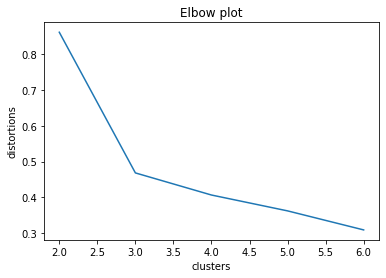

In [5]:
distortions = []
num_clusters = range(2, 7)
for i in num_clusters:
    centres, distortion = kmeans(df[['scaled_x_cord', 'scaled_y_cord']], i)
    distortions.append(distortion)

# plot
fig, ax = plt.subplots()
ax.plot(list(num_clusters), distortions)
ax.set(xlabel='clusters', ylabel='distortions', title='Elbow plot')
plt.show()

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [7]:
silhouette_avg = silhouette_score(df[['scaled_x_cord', 'scaled_y_cord']], df.cluster_labels)
silhouette_avg

0.6562396877441337

In [8]:
silhouette_vals = silhouette_samples(df[['scaled_x_cord', 'scaled_y_cord']], df.cluster_labels)
silhouette_vals

array([0.70946982, 0.62805507, 0.72406392, 0.49638691, 0.70175803,
       0.53868033, 0.75618213, 0.74157059, 0.6631376 , 0.66503708,
       0.74392112, 0.68998028, 0.73745175, 0.74070438, 0.76158137,
       0.588994  , 0.7373453 , 0.56367762, 0.69187861, 0.53861718,
       0.66390855, 0.66023074, 0.48556919, 0.75255815, 0.67603337,
       0.64867777, 0.47790817, 0.75770287, 0.70078212, 0.44532663])

In [9]:
from sklearn.datasets import make_blobs

In [10]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [11]:
X[:10]

array([[ -6.92324165, -10.66953197],
       [ -8.63062033,  -7.13940564],
       [ -9.63048069,  -2.72044935],
       [ -2.30647659,   5.30797676],
       [ -7.57005366,  -3.01446491],
       [ -1.00051011,   2.77905153],
       [ -4.81826839,  -2.77214822],
       [ -5.33964799,  -1.27625764],
       [ -7.9430884 ,  -3.89993901],
       [ -5.54924525,  -3.41298968]])

In [12]:
X = df.loc[:,['scaled_x_cord', 'scaled_y_cord']].values
X.shape

(30, 2)

Average silhouette score: 0.517526186401298
Average silhouette score: 0.6562396877441337
Average silhouette score: 0.5597380993889052
Average silhouette score: 0.48383539644004686
Average silhouette score: 0.3974908263916083


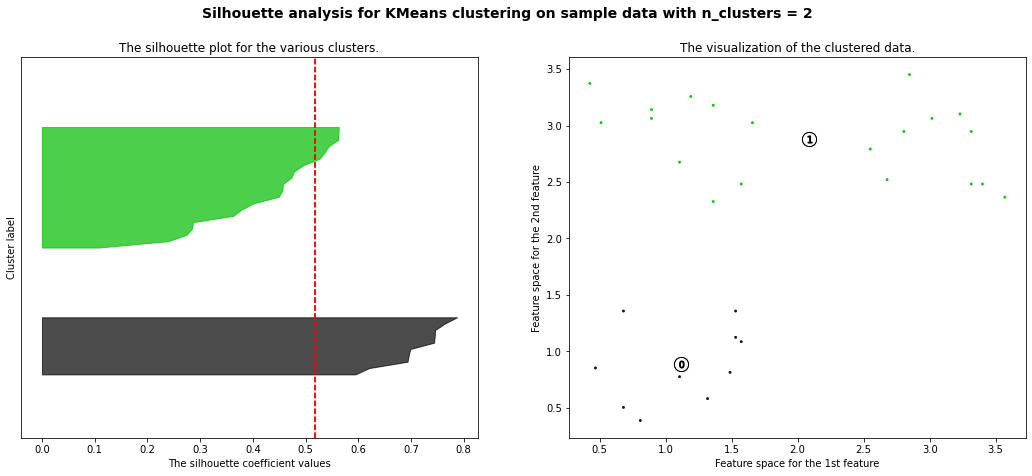

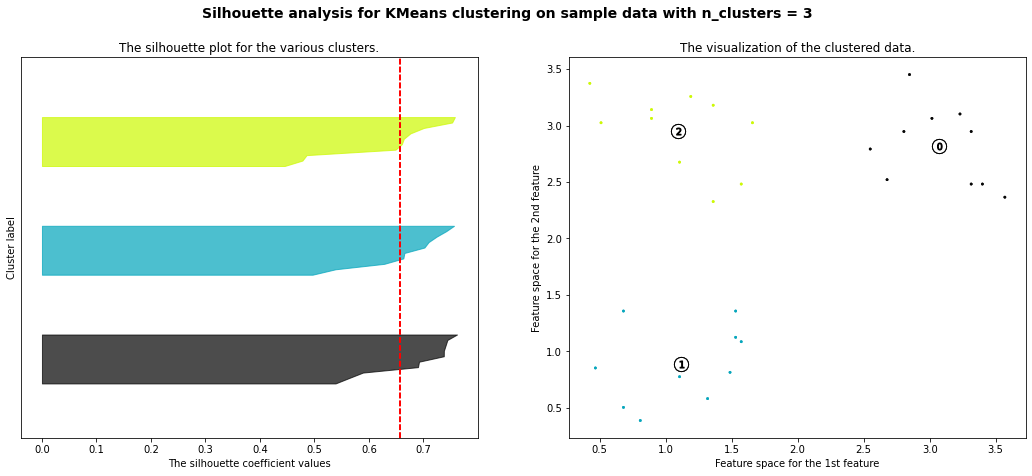

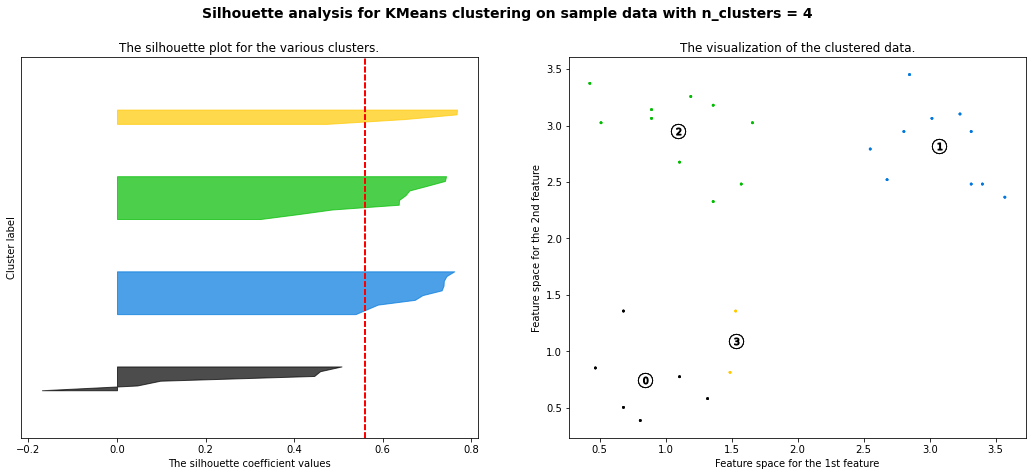

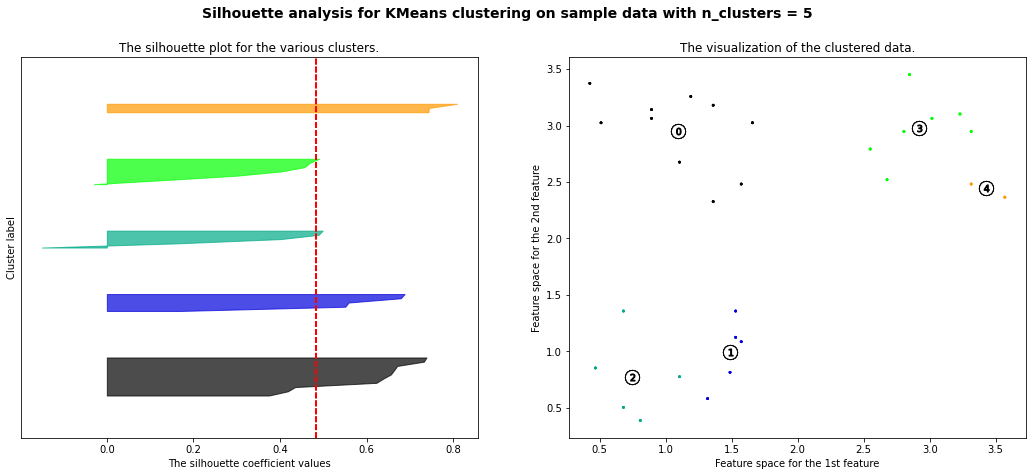

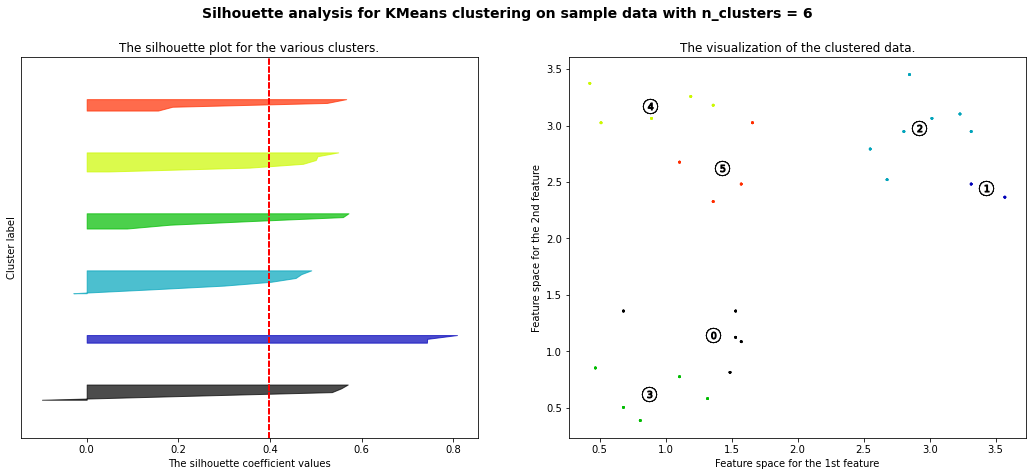

In [13]:
for cluster in num_clusters:
    # create a subplot;
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # (cluster + 1) * 10 is for inserting blank space between silhouette
    ax1.set_ylim([0, len(X) + (cluster + 1) * 10])
    cluster_centers, _ = kmeans(X, cluster)
    cluster_labels, _ = vq(X, cluster_centers)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Average silhouette score: {silhouette_avg}")
    sample_silhouette_vals = silhouette_samples(X, cluster_labels)
    y_lower=10
    for i in range(cluster):
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_clst_silh_vals = sample_silhouette_vals[cluster_labels == i]
        ith_clst_silh_vals.sort()
        size_clst_i = ith_clst_silh_vals.shape[0]
        y_upper = y_lower + size_clst_i
        
        color = cm.nipy_spectral(float(i) / cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_clst_silh_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # labels the silhouette plots with their cluster number at the middle
        ax.text(-0.05, y_lower + 0.5 * size_clst_i, str(i))
        # compute the new y_lower for next plot
        y_lower = y_upper + 10
        
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / cluster)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        # Draw white circles at cluster centers
        ax2.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(cluster_centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % cluster),
                     fontsize=14, fontweight='bold')
        
plt.show()